In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
#Set notebook preferences
pd.set_option('display.float_format', lambda x: '%.3f' % x)

plt.style.use('Solarize_Light2')

In [3]:
import yaml
path= r'/Users/ksharma/Documents/ML Engineer/Machine Learning/Projects/paysim_credit_fraud_analysis/'
config_name= 'config.yaml'

#read yaml file
with open(os.path.join(path, config_name)) as file:
    config = yaml.safe_load(file)
    
df= pd.read_csv(config['paths']['cleanedData'], dtype={'isFraud':'int', 'isFlaggedFraud':'int'})
df.drop('Unnamed: 0', axis= 1, inplace= True)

**Data Overview**

In [4]:
display(df.shape)
display(df.head())

(6362620, 9)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.640,170136.000,160296.360,0.000,0.000,0,0
1,1,PAYMENT,1864.280,21249.000,19384.720,0.000,0.000,0,0
2,1,TRANSFER,181.000,181.000,0.000,0.000,0.000,1,0
3,1,CASH_OUT,181.000,181.000,0.000,21182.000,0.000,1,0
4,1,PAYMENT,11668.140,41554.000,29885.860,0.000,0.000,0,0


**Preprocessing**

In [8]:
config['paths']['figures']

'/Users/ksharma/Documents/ML Engineer/Machine Learning/Projects/paysim_credit_fraud_analysis/reports/figures/'

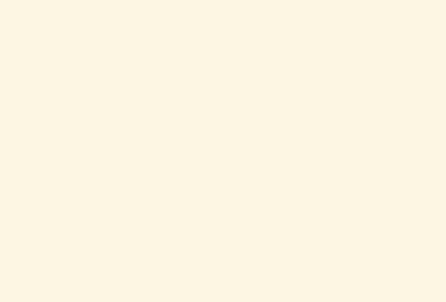

In [9]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(config['paths']['figures'] +'HeatMap.png')

In [6]:
#Copy original df & drop flags/newBalanceDest cols
temp= df.copy().drop(['isFlaggedFraud', 'newbalanceDest'], axis=1)

#Create dummies
dummies= pd.get_dummies(temp.iloc[:, :-1], drop_first=False)
dummies.loc[:,'isFraud']= temp.loc[:,'isFraud'].apply(lambda x: int(x))

dummies.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFraud
0,1,9839.640,170136.000,160296.360,0.000,0,0,0,1,0,0
1,1,1864.280,21249.000,19384.720,0.000,0,0,0,1,0,0
2,1,181.000,181.000,0.000,0.000,0,0,0,0,1,1
3,1,181.000,181.000,0.000,21182.000,0,1,0,0,0,1
4,1,11668.140,41554.000,29885.860,0.000,0,0,0,1,0,0


In [36]:
#Split data
X= dummies.iloc[:,:-1].values
y= dummies.iloc[:,-1].values

#Create training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 24, test_size=.1)


#Sanity check
for item in [X_train, X_test, y_train, y_test]:
    print(item.shape)

(5726358, 10)
(636262, 10)
(5726358,)
(636262,)


**Testing Models**

In [6]:
#start here
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()

Save trained model for Deployment

In [38]:
path= r''